### Build a DNN using Keras with `RELU` and `ADAM`

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!pip install -U tensorflow==2.0 --quiet

#### 1. Load tensorflow (1 Mark)

In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf

#### 2. Collect Fashion mnist data from tf.keras.datasets (1 Mark)

In [0]:
(trainX, trainY),(testX, testY) = tf.keras.datasets.fashion_mnist.load_data()

#### Please run this cell as class names are not included, need to create them to plot the images

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#### 3(a). Display Shapes of Train and Test sets (0.5 Mark)

In [6]:
trainX.shape

(60000, 28, 28)

In [7]:
testX.shape

(10000, 28, 28)

#### 3(b). Check how many classes (unique categories) we have in target column (0.5 Mark)

#### Hint: np.unique

In [8]:
np.unique(trainY, axis = 0)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

#### 4. Plot/Visualize the first image from the training dataset using matplotlib's imshow and display the class name below the image (2 Marks)

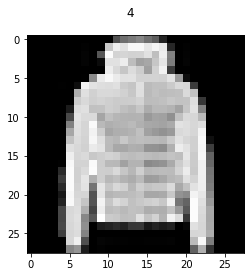

In [9]:
import matplotlib.pyplot as plt

img_num = np.random.randint(0,testX.shape[0])
plt.imshow(testX[img_num],cmap='gray')
plt.suptitle(str(testY[img_num]))
plt.show()

#### 5. Change train and test labels into one-hot vectors (1 Mark)

In [0]:
train_y = tf.keras.utils.to_categorical(trainY, num_classes=10)
test_y = tf.keras.utils.to_categorical(testY, num_classes=10)

### Build the Graph

#### 6.Initialize model, reshape & batch normalize data (1 Mark)

In [0]:
model1 = tf.keras.Sequential()

model1.add(tf.keras.layers.Reshape((784,), input_shape = (28, 28, )))
model1.add(tf.keras.layers.BatchNormalization())

#### 7(a). Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. (1 Mark)

In [0]:
#Layer - 1
model1.add(tf.keras.layers.Dense(200, activation = 'relu', name = 'Layer_1'))
model1.add(tf.keras.layers.BatchNormalization())

#Layer - 2
model1.add(tf.keras.layers.Dense(100, activation = 'relu', name = 'Layer_2'))
model1.add(tf.keras.layers.BatchNormalization())

#### 7(b). Add a dropout layer with `p=0.25` (1 Mark)

In [0]:
model1.add(tf.keras.layers.Dropout(0.25))

#### 8. Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. (1 Mark)

In [0]:
model1.add(tf.keras.layers.Dense(10, activation = 'softmax'))

### Compile Model
#### 9. Use `categorical_crossentropy` loss, `adam` optimizer, `accuracy` metric and compile the model. (1 Mark)

In [0]:
model1.compile(
                  optimizer = 'adam',
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy']
              )

### Model Training
#### 10. Fit your model on train set, using validation_split=0.2, epochs=10 and batch_size=32 and assign it to a variable "hist_model" which can be used to plot loss and accuracy curves using saved history. (5 Marks)

In [16]:
hist_model = model1.fit(
                          trainX, train_y,
                          validation_split = 0.2,
                           epochs = 10,
                           batch_size =32
                       )

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 15s 309us/sample - loss: 0.5376 - accuracy: 0.8112 - val_loss: 0.3701 - val_accuracy: 0.8673
Epoch 2/10
48000/48000 [==============================] - 13s 265us/sample - loss: 0.4073 - accuracy: 0.8517 - val_loss: 0.3456 - val_accuracy: 0.8727
Epoch 3/10
48000/48000 [==============================] - 13s 265us/sample - loss: 0.3702 - accuracy: 0.8661 - val_loss: 0.3344 - val_accuracy: 0.8768
Epoch 4/10
48000/48000 [==============================] - 13s 273us/sample - loss: 0.3420 - accuracy: 0.8753 - val_loss: 0.3328 - val_accuracy: 0.8797
Epoch 5/10
48000/48000 [==============================] - 13s 270us/sample - loss: 0.3213 - accuracy: 0.8799 - val_loss: 0.3117 - val_accuracy: 0.8843
Epoch 6/10
48000/48000 [==============================] - 13s 268us/sample - loss: 0.3079 - accuracy: 0.8867 - val_loss: 0.3226 - val_accuracy: 0.8829
Epoch 7/10
48000/48000 [====================

In [17]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
Layer_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
batch_normalization_1 (Batch (None, 200)               800       
_________________________________________________________________
Layer_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

In [18]:
hist_model.history

{'accuracy': [0.8111875,
  0.8516667,
  0.8660625,
  0.87527084,
  0.87991667,
  0.88666666,
  0.8923333,
  0.89533335,
  0.899125,
  0.9022083],
 'loss': [0.537572134266297,
  0.4072955068995555,
  0.37020150346060593,
  0.3419868487070004,
  0.3213018937458595,
  0.3079403018057346,
  0.291881279617548,
  0.28212369070202115,
  0.27239230225483574,
  0.26157874468714],
 'val_accuracy': [0.86733335,
  0.87266666,
  0.8768333,
  0.8796667,
  0.8843333,
  0.8829167,
  0.88175,
  0.88566667,
  0.8858333,
  0.89133334],
 'val_loss': [0.3700927164753278,
  0.34558835581938424,
  0.3344362634619077,
  0.33278054495652515,
  0.3117134609123071,
  0.32261659824848177,
  0.3185757823785146,
  0.31655605979760487,
  0.32325980949401856,
  0.3135404679477215]}

### Model Evaluation

#### 11. Visualize/Plot loss curves for training data, val data and provide your inference (2 Marks)

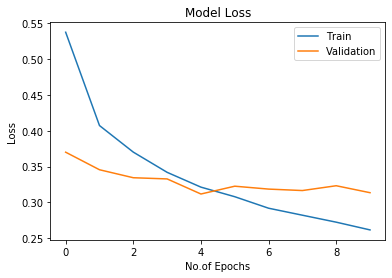

In [19]:
plt.plot(hist_model.history['loss'])
plt.plot(hist_model.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('No.of Epochs')
plt.legend(['Train', 'Validation'], loc = 'upper right')
plt.show()

#### 12. Visualize/Plot accuracy curves for training data, val data and provide your inference (2 Marks)

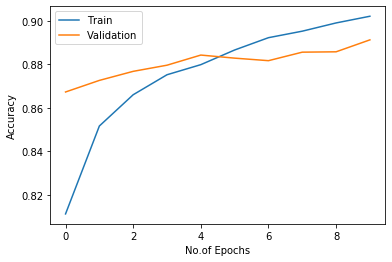

In [20]:
plt.plot(hist_model.history['accuracy'])
plt.plot(hist_model.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('No.of Epochs')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

Observations From Accuracy and Loss Curves

1. For Training Data, the loss is decreased exponentially
2. For Validation data, the loss is decreased initially and increased at 5th, 8th epochs
3. For Trainin Data, the accuracy is increased linearly with increase in number of epochs
4. For Validation Data, the accuracy is raised little high at 4th epoch and decreased little after 4th epoch and at 6th epoch again it increased little

In [0]:
#### 13. Evaluate the above model on test set and report test loss & accuracy (1 Mark)
#### Hint: model.evaluate()

In [22]:
model1.evaluate(testX, test_y, batch_size=32)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3499973425865173, 0.883]

#### 14. Predict the labels for test set and store in a variable named "predictions" (1 Mark)

#### Hint: model.predict()

In [0]:
predictions = model1.predict(tf.cast(testX, tf.float32))

#### 15. Write a for loop to visualize, display actual label, predicted label along with class names for 0th, 100th and 200th images in test set.  
#### (3 Marks)

Image 0
Actual Label 9
Actual Class Ankle boot


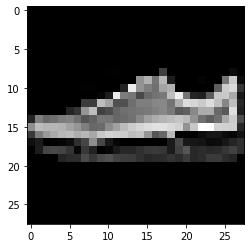

Predicted Label 9
Predicted Class Ankle boot


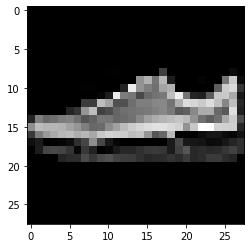

----------------------------------------------
Image 100
Actual Label 3
Actual Class Dress


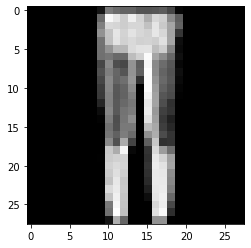

Predicted Label 3
Predicted Class Dress


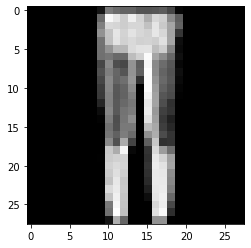

----------------------------------------------
Image 200
Actual Label 1
Actual Class Trouser


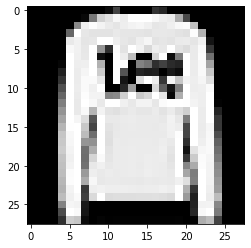

Predicted Label 1
Predicted Class Trouser


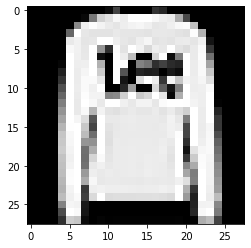

----------------------------------------------


In [26]:
lstImageIndexes = [0, 100, 200]

actual_label = None
predicted_label = None

for index in lstImageIndexes:
  print('Image ' + str(index))
  actual_label = testY[index]
  predicted_label = np.argmax(predictions[index])

  print('Actual Label '+ str(actual_label))
  print('Actual Class ' + str(class_names[actual_label]))
  img_num = actual_label
  plt.imshow(testX[img_num],cmap='gray')
  plt.show()


  print('Predicted Label ' + str(predicted_label))
  print('Predicted Class ' + str(class_names[predicted_label]))
  img_num = predicted_label
  plt.imshow(testX[img_num],cmap='gray')
  plt.show()
  print('----------------------------------------------')